# BREAST CANCER DETECTION USING SVM AND KNN

*Data set is from UCI machine leaning repository*

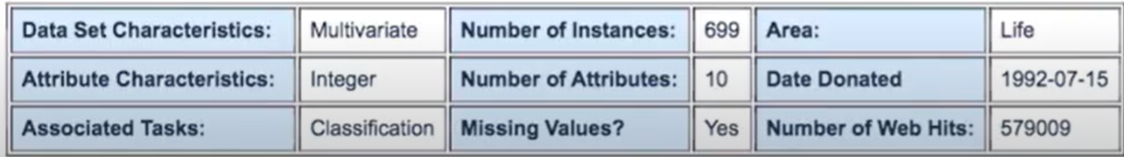

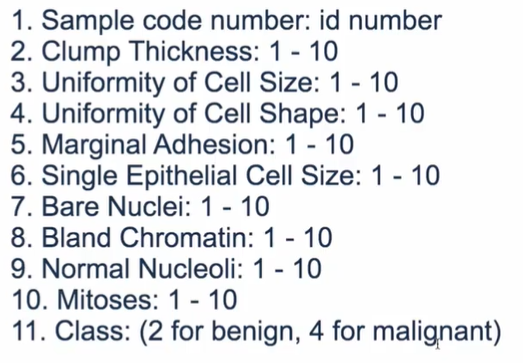

* Maignant -> cancerous
* Benign -> non cancerous

In [1]:
from pyforest import*
lazy_imports()

['from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn import metrics',
 'import datetime as dt',
 'from sklearn.preprocessing import OneHotEncoder',
 'import bokeh',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.linear_model import ElasticNetCV',
 'import numpy as np',
 'from sklearn.ensemble import RandomForestClassifier',
 'import plotly.graph_objs as go',
 'import spacy',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import dash',
 'from sklearn.model_selection import StratifiedKFold',
 'from xlrd import open_workbook',
 'from openpyxl import load_workbook',
 'from pathlib import Path',
 'import nltk',
 'from dask import dataframe as dd',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.linear_model import ElasticNet',
 'import matplotlib as mpl',

In [2]:
data = pd.read_csv("breastCancer.csv")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**Data preprocessing**

In [4]:
data['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [5]:
data.shape

(699, 11)

In [6]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [7]:
data['bare_nucleoli'].value_counts()

bare_nucleoli
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [8]:
df = data.replace("?",np.nan)

<IPython.core.display.Javascript object>

In [9]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
df['bare_nucleoli'].isna().sum()

16

In [11]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
df = df.fillna(df.median())# All the empty values are removed 

In [13]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [14]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [15]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

**EXPLORATORY DATA ANALYSIS**

In [16]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
df = df.drop('id',axis=1)

In [18]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


**BIVARIATE DATA ANALYSIS**

<IPython.core.display.Javascript object>

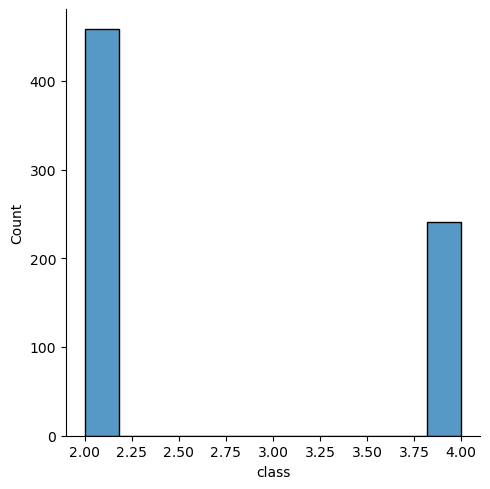

In [20]:
sns.displot(df['class'])

**Multivariate Data Analysis**

<IPython.core.display.Javascript object>

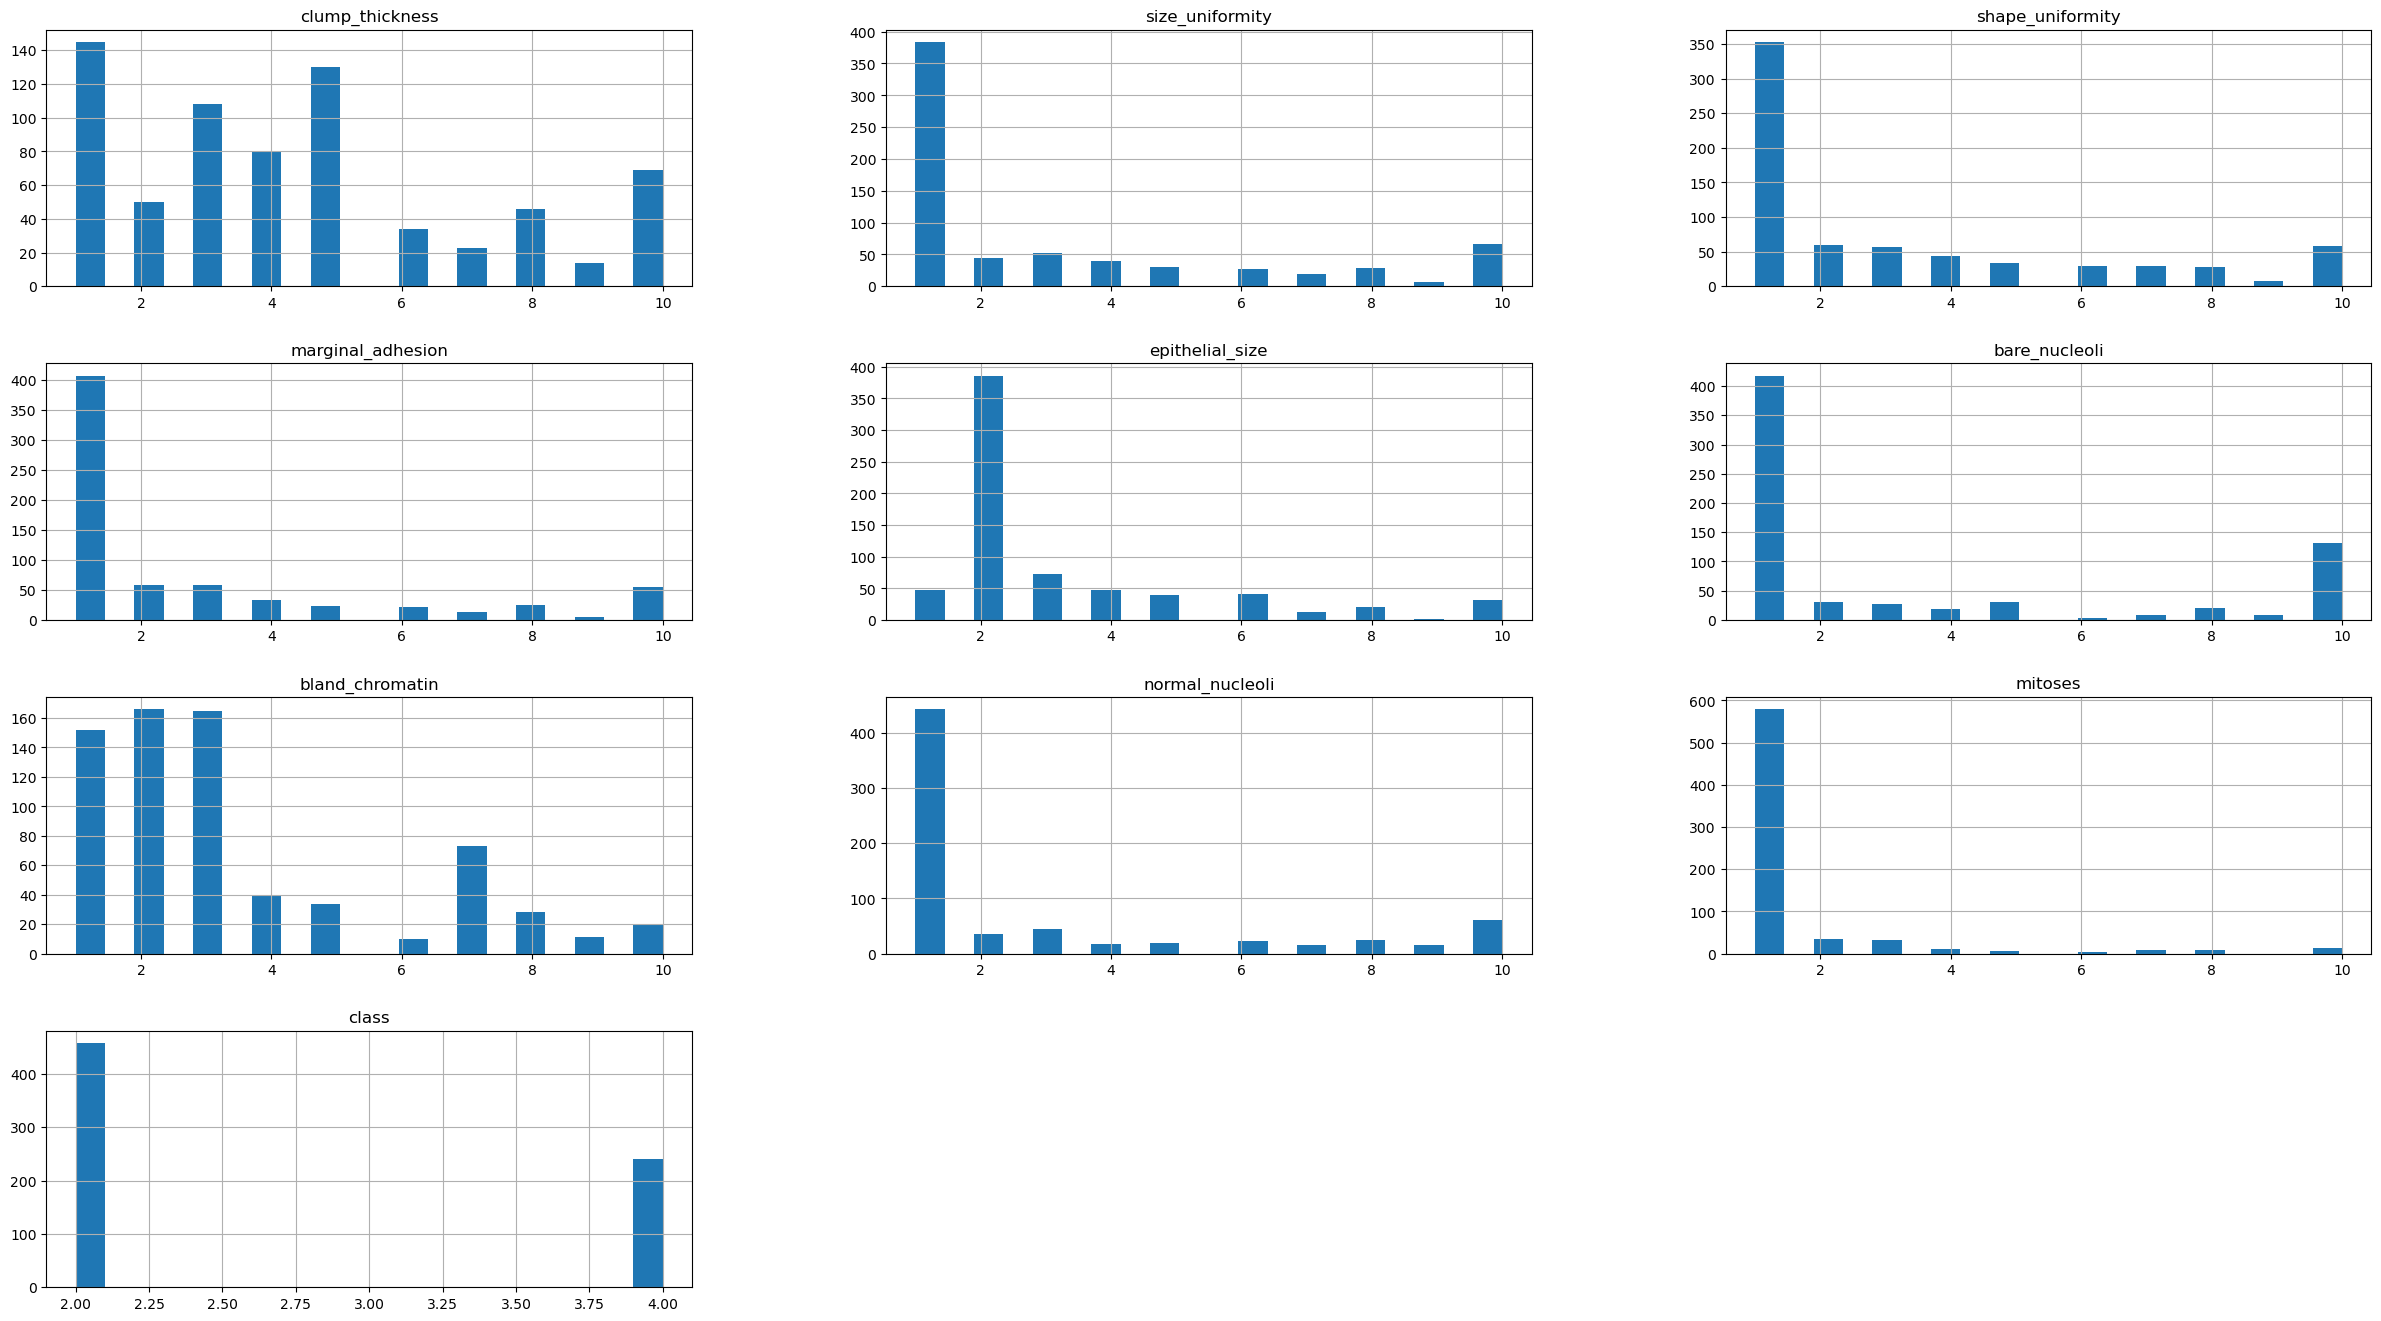

In [21]:
df.hist(bins=20,figsize=(30,25),layout = (6,3))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

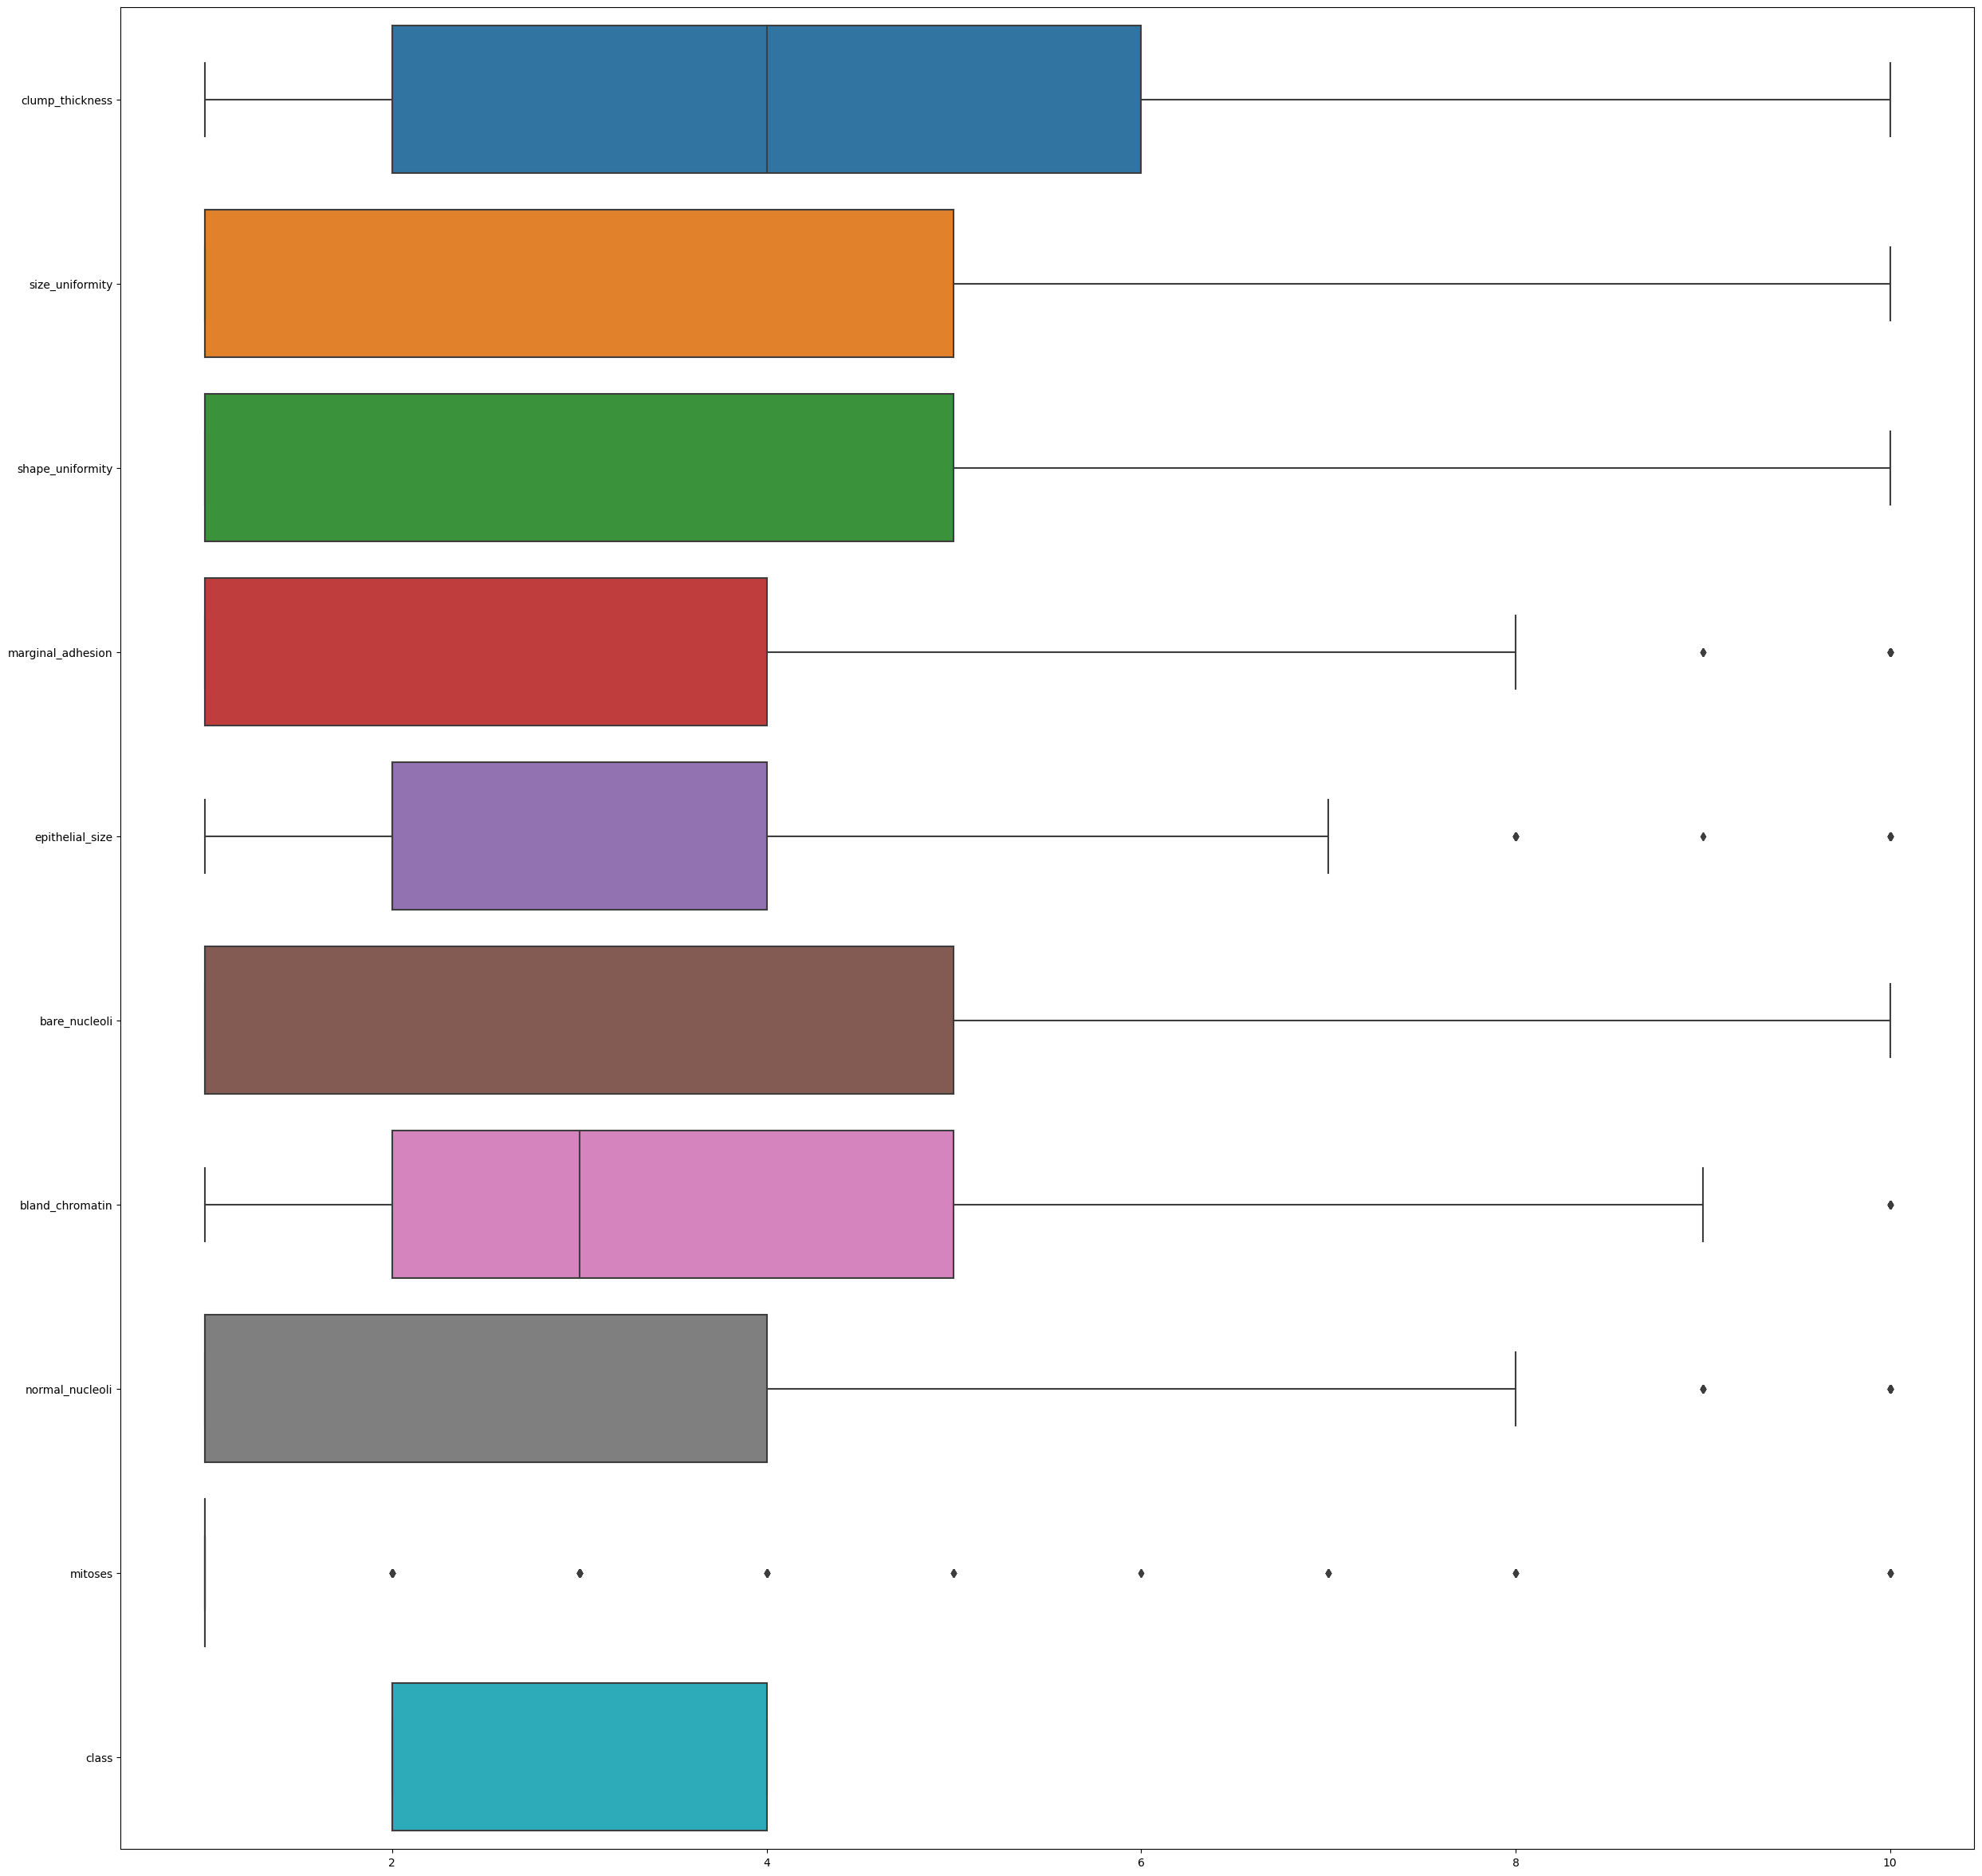

In [22]:
plt.figure(figsize=(30,30))
sns.boxplot(data =df,orient = 'h')
plt.show()

In [23]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

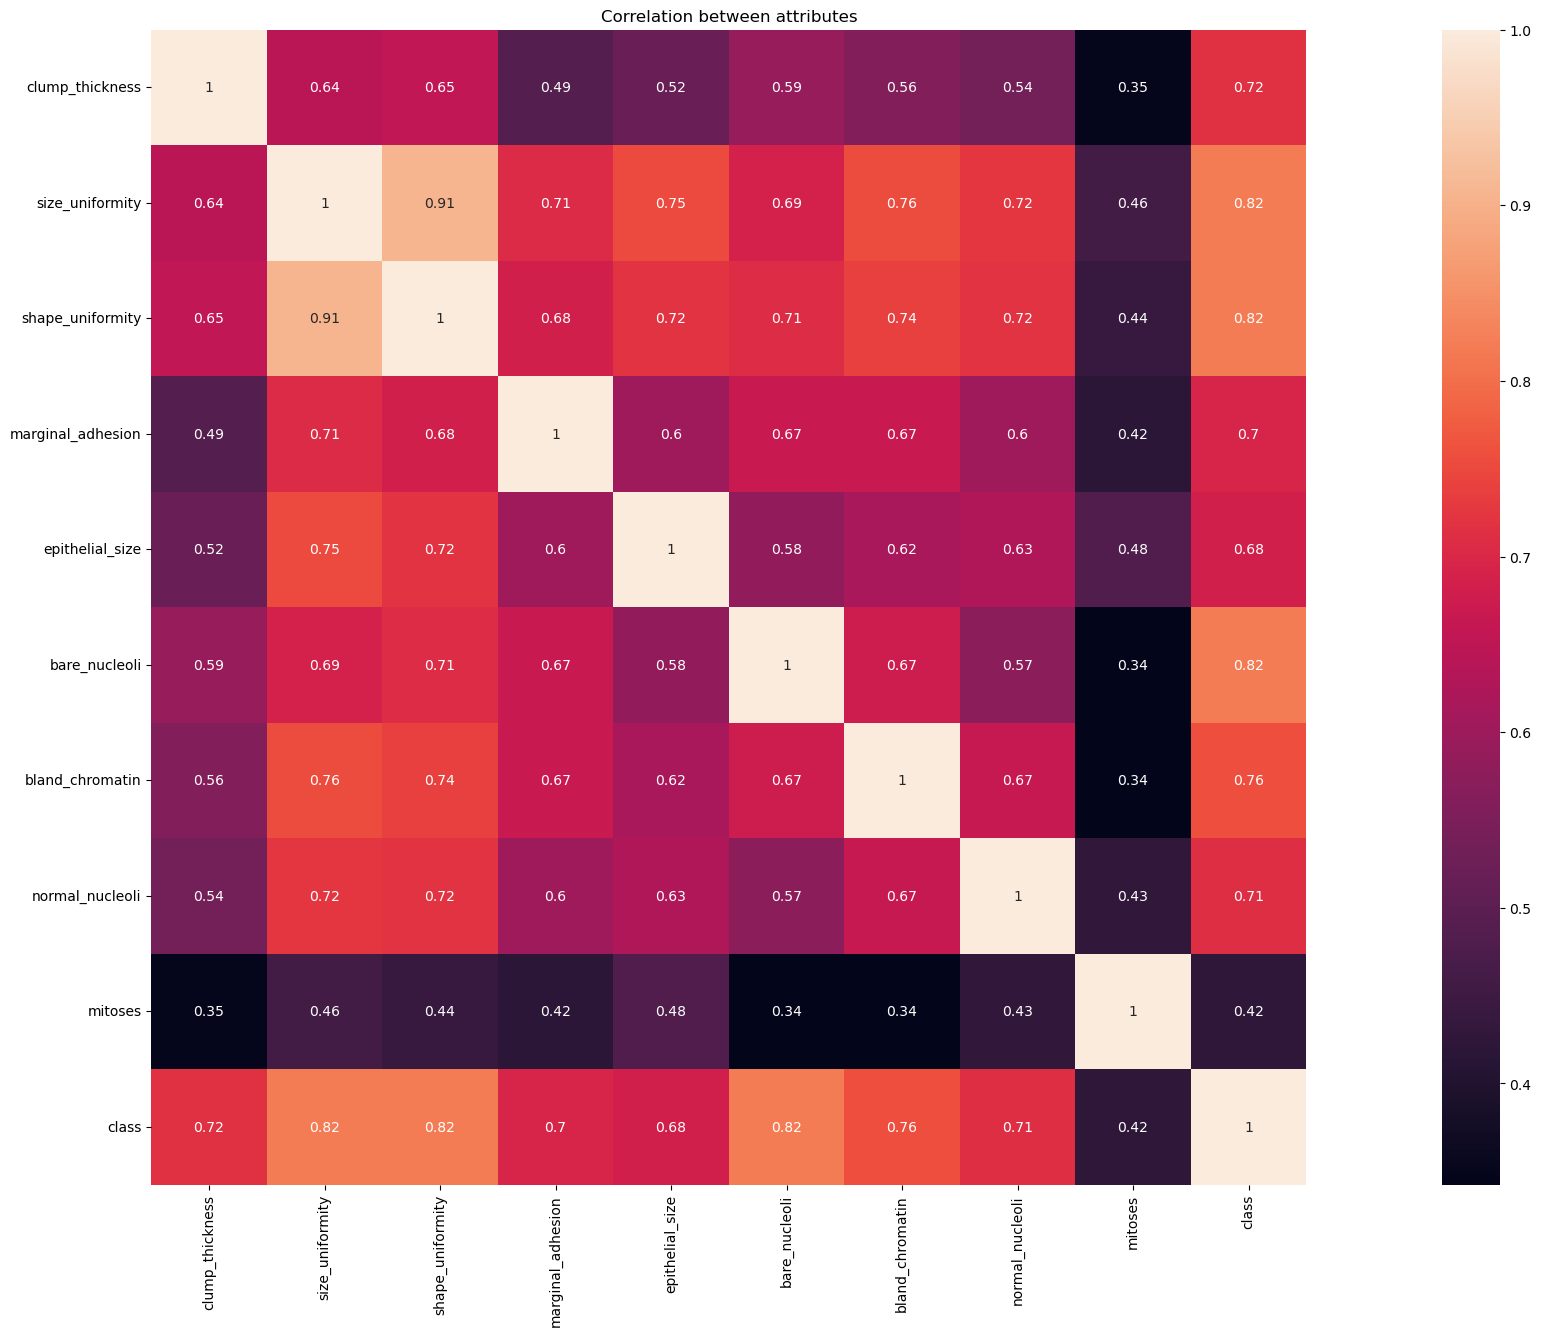

In [24]:
plt.figure(figsize = (35,15))
sns.heatmap(df.corr(),vmax = 1,square = True,annot = True)
plt.title("Correlation between attributes")
plt.show()

<IPython.core.display.Javascript object>

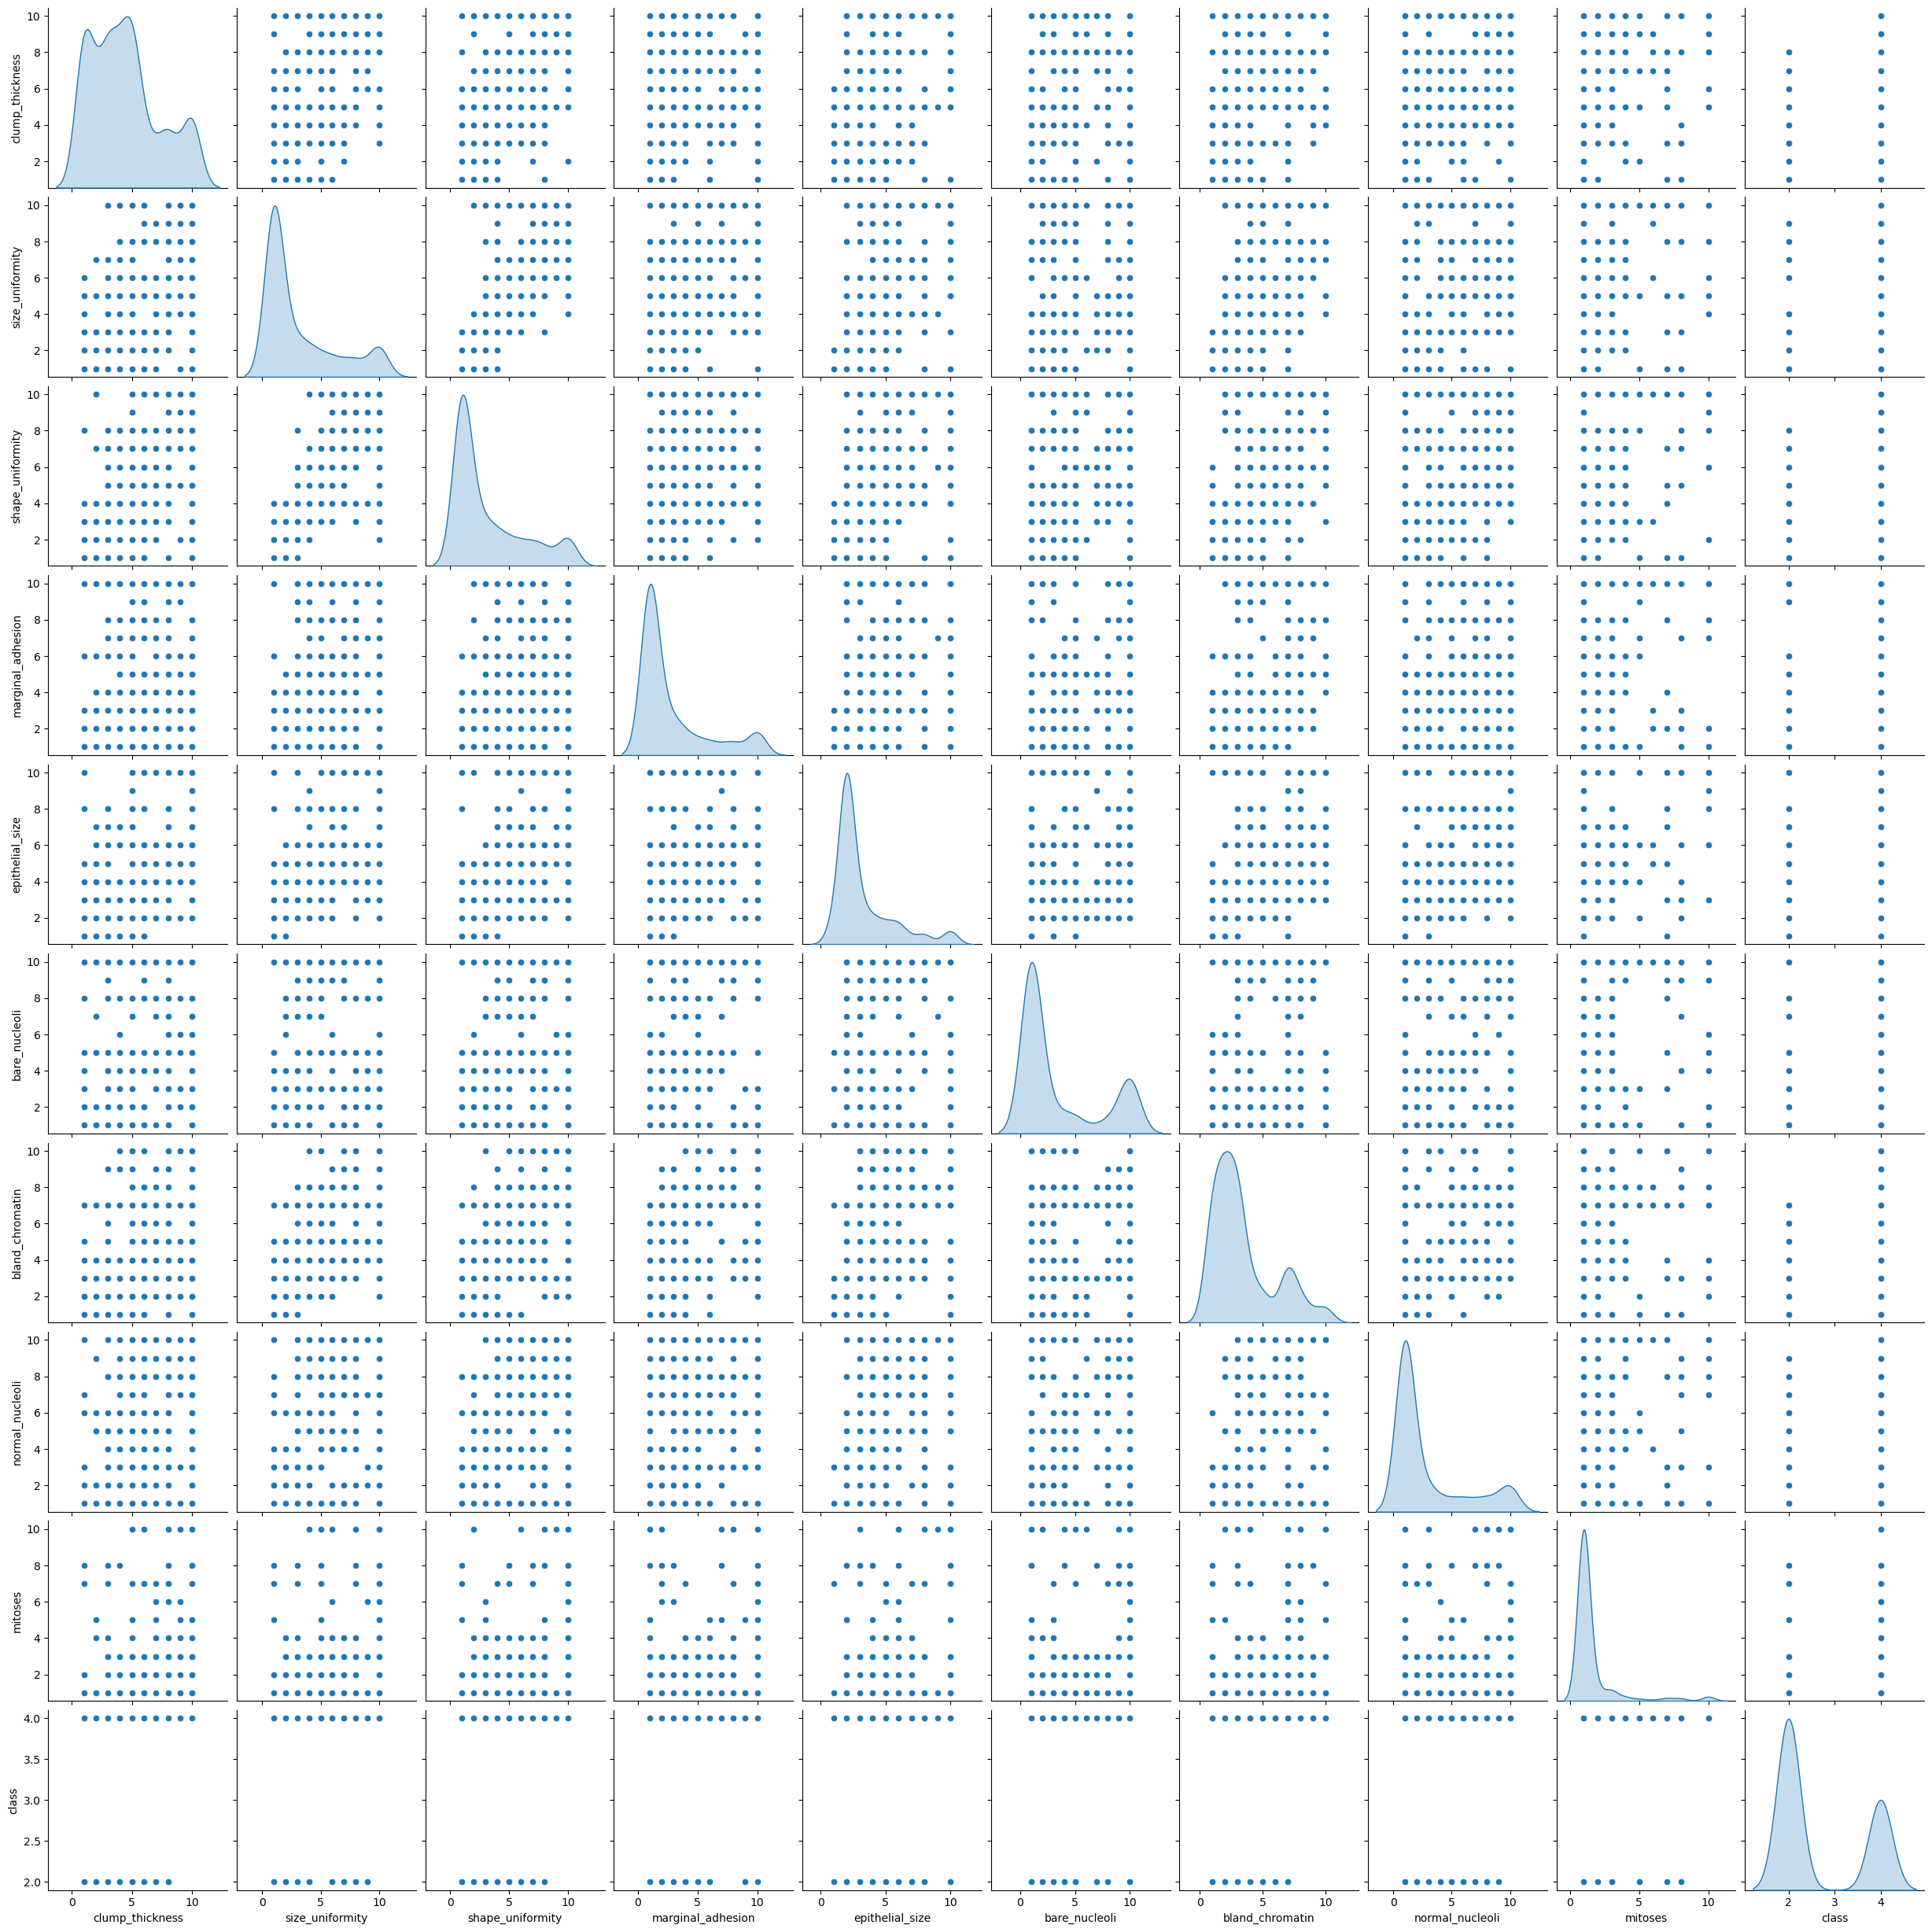

In [25]:
sns.pairplot(df,diag_kind = 'kde')

**BUILDING THE MODEL**

In [26]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [27]:
x = df.drop('class',axis = 1)
y = df['class']

In [28]:
x

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [29]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 1)

**KNeighborsClassifier**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
KNN = KNeighborsClassifier(n_neighbors = 5,weights = 'distance')

In [33]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [34]:
KNN_predict = KNN.predict(x_test)

In [35]:
KNN_predict

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

**SUPPORT VECTOR MACHINE**

In [36]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [37]:
svc_predict = svc.predict(x_test)

In [38]:
from scipy.stats import zscore

print("KNeighborsclassifier algorithm is predicting at:",svc.score(x_test,y_test)*100)

KNeighborsclassifier algorithm is predicting at: 98.09523809523809


In [39]:
knn_predict_df = pd.DataFrame(KNN_predict)

<IPython.core.display.Javascript object>

In [40]:
svc_predict_df = pd.DataFrame(svc_predict)

<IPython.core.display.Javascript object>

In [41]:
df = pd.concat([knn_predict_df,svc_predict_df],axis = 1)

<IPython.core.display.Javascript object>

In [42]:
df

,0,0
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,4


In [43]:
df.columns = [['KNN PREDICTIONS ','SVC PREDICTIONS']]

In [44]:
df

,KNN PREDICTIONS,SVC PREDICTIONS
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,4


In [45]:
from sklearn.metrics import classification_report

In [46]:
print("KNN CLASSIFICATION REPORT")
print(classification_report(y_test,KNN_predict))

KNN CLASSIFICATION REPORT
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.99      0.95      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



In [47]:
print("SVC CLASSIFICATION REPORT")
print(classification_report(y_test,svc_predict))

SVC CLASSIFICATION REPORT
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

CONFUSION MATRIX FOR KNN
----------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

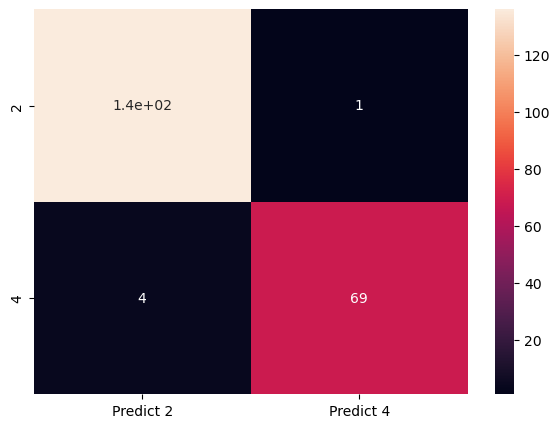

In [49]:
print("CONFUSION MATRIX FOR KNN")
print("-"*10)

cm = metrics.confusion_matrix(y_test,KNN_predict,labels = [2,4])

df_cm = pd.DataFrame(cm,index = [ i for i in [2,4]],
                     columns = [ i for i in ['Predict 2','Predict 4']])
                     
plt.figure(figsize =(7,5))
sns.heatmap(df_cm,annot=True)
plt.show()
                                 

CONFUSION MATRIX FOR SVC
----------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

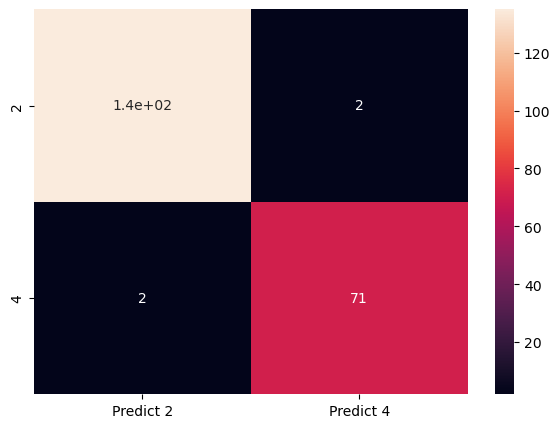

In [50]:
print("CONFUSION MATRIX FOR SVC")
print("-"*10)

cm = metrics.confusion_matrix(y_test,svc_predict,labels = [2,4])

df_cm = pd.DataFrame(cm,index = [ i for i in [2,4]],
                     columns = [ i for i in ['Predict 2','Predict 4']])
                     
plt.figure(figsize =(7,5))
sns.heatmap(df_cm,annot=True)
plt.show()